In [1]:
import os
import h5py
import numpy as np
import scipy.stats as st
import scipy.special as sp

In [2]:
%load_ext autoreload
%autoreload 2

### Simple probability tests  

    cout << "Vector of 10 random numbers from normal:\n" << rsg.draw(10) << endl;
    cout << "Vector of 10 random numbers from poisson:\n" << rsg2.draw(10) << endl;
    cout << "Vector of 10 random numbers from U(1,10):\n" << rsg3.draw(10) << endl;

    // Calc log density and log likelihood of Normal
    size_t n(3);
    Vector norm_sample(n);
    Vector means(n);
    means << 2.1, 2.8, 1.9;
    Matrix cov(n, n), ltm;
    cov << 0.5, 0.25, 0.34, 0.25, 0.6, 0.36, 0.34, 0.36, 0.4;
    Eigen::LLT<Matrix> llt(static_cast<Eigen::Index>(n));
    ltm = llt.compute(cov).matrixL();
    norm_sample = NormalDist::sample(means, ltm, rsg);
    cout << "A multivariate sample from normal distribution:\n" << norm_sample << endl;
    cout << "Logdensity of the multivariate sample:\n" << NormalDist::logDensity(norm_sample, means, ltm) << endl;

    norm_sample = NormalDist::sample(10, 3.4, 0.5, rsg);
    cout << "A sample of 10 i.i.d. normally distributed variables N(3.4, 0.5):\n" << norm_sample << endl;
    cout << "loglikelihood of the sample:\n" << NormalDist::logLikelihood(norm_sample, 3.4, 0.5) << endl;

with seed = 1:
Vector of 10 random numbers from normal:
 -1.40287
-0.549746
 -1.04515
  1.58275
 -1.95939
 0.257594
-0.315292
 -1.50781
 0.071343
 0.858179\
Vector of 10 random numbers from poisson:
1
4
3
0
0
2
1
0
0
1\
Vector of 10 random numbers from U(1,10):
 4
10
 3
 1
 5
10
 3
 8
 8
10\
A multivariate sample from normal distribution:
2.05069
2.14442
1.62952\
Logdensity of the multivariate sample:
1.48471\
A sample of 10 i.i.d. normally distributed variables N(3.4, 0.5):
2.97502
2.56003
3.75254
3.97848
4.39999
 2.6235
3.49656
3.72458
3.39499
3.51918\
loglikelihood of the sample:
-8.41175

In [2]:
print('Vector of 10 random numbers from normal')
st.norm.rvs(size=10, random_state=1)

Vector of 10 random numbers from normal


array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038])

In [3]:
print('Vector of 10 random numbers from poisson')
st.poisson.rvs(1., size=10, random_state=0)

Vector of 10 random numbers from poisson


array([2, 1, 1, 2, 2, 1, 0, 0, 5, 1])

In [4]:
print('Vector of 10 random numbers from U(1,10)')
st.randint.rvs(1, 10+1, size=10, random_state=0)

Vector of 10 random numbers from U(1,10)


array([ 6,  1,  4,  4,  8, 10,  4,  6,  3,  5])

In [7]:
print('A multivariate sample from normal distribution:')
mu = np.array([2.1, 2.8, 1.9])
cov = np.array([[0.5, 0.25, 0.34], [0.25, 0.6, 0.36], [0.34, 0.36, 0.4]])
st.multivariate_normal.rvs(mu, cov, size=1, random_state=0)

A multivariate sample from normal distribution:


array([1.12121491, 1.38134607, 1.0772525 ])

In [6]:
print("Lower triangular view of Cholesky decomposition")
np.linalg.cholesky(cov)

Lower triangular view of Cholesky decomposition


array([[0.70710678, 0.        , 0.        ],
       [0.35355339, 0.68920244, 0.        ],
       [0.48083261, 0.27568098, 0.30463092]])

In [8]:
print('Logdensity of the multivariate sample:')
x = np.array([2.05069, 2.14442, 1.62952])
np.log(st.multivariate_normal.pdf(x, mu, cov)*pow(2*np.pi,x.size/2))

Logdensity of the multivariate sample:


1.4847181990220342

In [10]:
print("Square of normalized variable")
pow(np.linalg.inv(np.linalg.cholesky(cov)) @ (x - mu), 2).sum()

Square of normalized variable


7.657783264037203

In [19]:
print("Log determinant of Cholesky lower param")
0.5*np.log(np.linalg.det(cov))

Log determinant of Cholesky lower param


-1.9074481473487115

In [9]:
print('A sample of 10 i.i.d. normally distributed variables N(3.4, 0.5):')
st.norm.rvs(3.4,0.5,size=10,random_state=1)

A sample of 10 i.i.d. normally distributed variables N(3.4, 0.5):


array([4.21217268, 3.09412179, 3.13591412, 2.86351569, 3.83270381,
       2.24923065, 4.27240588, 3.01939655, 3.55951955, 3.27531481])

In [129]:
st.norm.rvs(size=10,random_state=1)*0.5+3.4

array([4.21217268, 3.09412179, 3.13591412, 2.86351569, 3.83270381,
       2.24923065, 4.27240588, 3.01939655, 3.55951955, 3.27531481])

In [12]:
np.log(st.norm.pdf([2.97502, 2.56003, 3.75254, 3.97848, 4.39999, 2.6235, 3.49656, 3.72458, 3.39499, 3.51918], 3.4, 0.5)).sum()

-8.411750318247273

In [16]:
n = 10
-(n/2) * np.log(2 * np.pi) - n * np.log(0.5) - .5*pow(np.array([2.97502, 2.56003, 3.75254, 3.97848, 4.39999, 2.6235, 3.49656, 3.72458, 3.39499, 3.51918]) - 3.4, 2).sum() / pow(0.5, 2)

-8.411750318247272

    n = 5;
    Vector_int pois_sample(n);
    Vector lambdas(n);
    lambdas << 2.1, 2.8, 1.9, 0.5, 1.7;
    pois_sample = PoissonDist::sample(lambdas, rsg2);
    cout << "A multivariate sample from poisson distribution:\n" << pois_sample << endl;
    cout << "Logdensity of the multivariate poisson:\n" << PoissonDist::logDensity(pois_sample, lambdas.array()) << endl;

    std::poisson_distribution<> pois(3.4);
    RandomSample<std::mt19937, std::poisson_distribution<> > rsg4{pois, 1};
    pois_sample = PoissonDist::sample(n, rsg4);
    cout << "A sample of 5 i.i.d. poisson distributed variables Poi(3.4):\n" << pois_sample << endl;
    cout << "loglikelihood of the sample:\n" << PoissonDist::logLikelihood(pois_sample, 3.4) << endl;

A multivariate sample from poisson distribution:
0
2
4
0
2\
Logdensity of the multivariate poisson:
-3.31209\
A sample of 5 i.i.d. poisson distributed variables Poi(3.4):
4
4
2
1
6\
loglikelihood of the sample:
-9.82432


In [17]:
lambdas = np.array([2.1, 2.8, 1.9, 0.5, 1.7])

print('A multivariate sample from poisson distribution:')
for l in lambdas:
    print(st.poisson.rvs(l, size=1, random_state=0)[0], end='\t')

A multivariate sample from poisson distribution:
4	4	3	0	3	

In [19]:
print('Logdensity of multivariate poisson sample:')
x = [0, 2, 4, 0, 2]
ld = 0
for i in range(len(x)):
    ld += (np.log(st.poisson.pmf(x[i], lambdas[i])) + sp.gammaln(x[i]+1))

print(ld)

Logdensity of multivariate poisson sample:
-3.312089118823764


In [20]:
print('A sample of 5 i.i.d. poisson distributed variables Poi(3.4):')
st.poisson.rvs(3.4, size=5, random_state=0)

A sample of 5 i.i.d. poisson distributed variables Poi(3.4):


array([6, 7, 1, 7, 4])

In [21]:
print('loglikelihood of the sample:')
newx = np.array([4, 4, 2, 1, 6])
lh = 1
for xx in newx:
    lh *= st.poisson.pmf(xx, 3.4)
np.log(lh)

loglikelihood of the sample:


-9.824323715689971

In [30]:
print('Logdensity of multivariate poisson sample:')
ld = 0
obs = np.array([2, 1, 0, 0, 0, 2, 0, 0, 0, 0])
for i in range(len(obs)):
    ld += (np.log(st.poisson.pmf(obs[i], lambdas[i])) + sp.gammaln(obs[i]+1))

print(ld)

Logdensity of multivariate poisson sample:
-7.2816782164730975


In [36]:
print('A multivariate sample from poisson distribution:')
for l in lambdas:
    print(st.poisson.rvs(l, size=1, random_state=0)[0], end='\t')

A multivariate sample from poisson distribution:
0	0	0	0	0	0	0	0	0	0	

In [43]:
st.poisson.isf(.025, 6), st.poisson.ppf(.025, 6)

(11.0, 2.0)

### Kalman filter tests  

In [6]:
print("Covariance:\n", cov)
print("Means:", mu)

Covariance:
 [[0.5  0.25 0.34]
 [0.25 0.6  0.36]
 [0.34 0.36 0.4 ]]
Means: [2.1 2.8 1.9]


In [8]:
llt = np.linalg.cholesky(cov)
llt

array([[0.70710678, 0.        , 0.        ],
       [0.35355339, 0.68920244, 0.        ],
       [0.48083261, 0.27568098, 0.30463092]])

In [10]:
tau = np.array([[1,2,3], [4,5,6], [7,8,9]])
I = np.eye(3)

In [13]:
llt @ np.linalg.inv(I + llt.T @ tau @ llt) @ llt.T

array([[ 0.23492717, -0.09441198,  0.03387376],
       [-0.13410482,  0.17134519, -0.02937144],
       [ 0.00330964, -0.02324342,  0.05291619]])

In [14]:
np.linalg.inv(np.linalg.inv(cov) + tau)

array([[ 0.23492717, -0.09441198,  0.03387376],
       [-0.13410482,  0.17134519, -0.02937144],
       [ 0.00330964, -0.02324342,  0.05291619]])

In [17]:
sqrd = cov@cov

In [18]:
cov @ np.linalg.inv(I + cov.T @ tau @ cov) @ cov.T

array([[ 0.07186575, -0.01640451,  0.02901848],
       [-0.02672973,  0.06390161,  0.01030243],
       [ 0.0238772 ,  0.014967  ,  0.02295986]])

In [19]:
np.linalg.inv(np.linalg.inv(sqrd) + tau)

array([[ 0.07186575, -0.01640451,  0.02901848],
       [-0.02672973,  0.06390161,  0.01030243],
       [ 0.0238772 ,  0.014967  ,  0.02295986]])

#### Covariance filter   

In [2]:
def string2array(chars):
    ar = np.array([x for x in chars.split(" ")])
    ar = np.vstack(np.split(ar[ar!=''].astype(np.float64),4)).T
    return ar

In [307]:
norm_iid = st.norm.rvs(size=2*10*250, random_state=1)
n=4
T=10
A = np.eye(n) * 0.9
C = np.eye(n) * 0.6
Q = np.ones((n,n)) * 0.7 + np.eye(n) * 0.3
R = np.eye(n)
minit = np.zeros(n)
Sinit = Q * (1/(1-0.9*0.9))
LQ = np.linalg.cholesky(Q)
LR = np.linalg.cholesky(R)
LQinit = np.linalg.cholesky(Sinit)

In [ ]:
cppnorm = np.array([ -1.40287, -0.549746,  -1.04515,   1.58275,  -1.95939,
-0.315292,  -1.50781,  0.071343,  0.858179,  -1.41555,
 0.631902,  0.885829, -0.903123, 0.0402604,  0.194431,
 0.777351, -0.535249, -0.442851,  0.171338,  0.924346,
-0.380575,  -1.30486, -0.437122, -0.743627,   1.38141,
-0.369457, 0.0983705,   1.01499,  -1.27322,   -0.2871])

state = A@minit + LQinit@cppnorm[:10]
obs = C@state + LR@cppnorm[10:20]
obs

In [13]:
data = np.empty((10,250))
state = A@minit + LQinit@norm_iid[:10]
obs = C@state + LR@norm_iid[10:20]
data[:,0] = obs

In [14]:
for i in range(1,250):
    state = A@state + LQ@norm_iid[i*20:i*20+10]
    obs = C@state + LR@norm_iid[i*20+10:i*20+20]
    data[:,i] = obs

In [308]:
import utils

xinit = np.zeros((n, T))
seeds = 5
scales = np.array([0.2, 0.8])

trm = utils.TransitionSpec(A, Q, minit, Sinit)
obsm = utils.ObservationSpec(utils.ModelType.LINEAR_GAUSS, C, R)
smplr = utils.SamplerSpec(utils.SamplerType.METROPOLIS)
sim = utils.SimulationSpec(100, seeds, xinit, scaling=scales)
dataspec = utils.Data(seed=100)
smthr = utils.SmootherSpec(utils.FilterType.INFORMATION, utils.SmootherType.RTS)
mcmc = utils.MCMCsession(T, trm, obsm, smplr, sim, dataspec, smthr)

In [309]:
mcmc.run()

Loaded model specifications.

Running Kalman smoother...	Done
Results saved into ../data/kalman_smoother_results.h5

Running sampler for met_gauss_noreverse with 1 seeds:
	running with seed 5 ...
	Done in 2ms
	results (and data used) saved into ../data/met_gauss_noreverse_results_seed5.h5

######### All done #########
Set results for seed seed5


In [311]:
smth_res = utils.SmootherResults()

In [329]:
def kalman_filter(obs, state_mean, state_cov, priorm, priors, step):
    x_size = state_mean.size
    y_size = obs.size
    x = np.empty_like(state_mean)
    X = np.empty_like(state_cov)
    r = np.empty_like(obs)
    tempXY = np.empty((x_size, y_size))
    M = np.empty((y_size, y_size))
    K = np.empty((x_size, y_size))
    if step != 0:
        x = A @ state_mean
        X = A @ state_cov @ A.T + Q
    else:
        x = np.copy(state_mean)
        X = np.copy(state_cov)
    
    priorm[step] = x
    priors[step] = X
    
    r = obs - C @ x
    tempXY = X @ C.T
    M = C @ tempXY + R
#     print("Innovation cov:", M, sep="\n") 
    K = tempXY @ np.linalg.inv(M)
#     print("Kalman gain:", K, sep="\n")
    x += K @ r
    X -= K @ C @ X
    return x, X

In [330]:
def rts_smoother(state_mean, state_cov, mean_prior, mean_posterior, cov_prior, cov_posterior):
    X = np.copy(state_cov)
    x = np.copy(state_mean)
    J = cov_posterior @ A.T @ np.linalg.inv(cov_prior)
    X = cov_posterior + J @ (X - cov_prior) @ J.T
    x = mean_posterior + J @ (x - mean_prior)
    return x, X
    

In [332]:
mu = minit
Sigma = Sinit
sigmas = np.empty((T,n,n))
mus = np.empty((T,n))
mu_priors = np.empty_like(mus)
sigma_priors = np.empty_like(sigmas)

for i in range(T):
    mu, Sigma = kalman_filter(mcmc.data.ravel().reshape(T,n)[i], mu, Sigma, mu_priors, sigma_priors, i)
    mus[i] = mu
    sigmas[i] = Sigma

In [334]:
muT = mus[-1]
SigmaT = sigmas[-1]
smoothed_sigmas = np.zeros_like(sigmas)
smoothed_means = np.zeros_like(mus)
smoothed_sigmas[T-1] = SigmaT
smoothed_means[T-1] = muT
for i in range(T-2,-1,-1):
    muT, SigmaT = rts_smoother(muT, SigmaT, mu_priors[i+1], mus[i], sigma_priors[i+1], sigmas[i])
    smoothed_sigmas[i] = SigmaT
    smoothed_means[i] = muT

In [349]:
smth_res.means.reshape(T,-1)

array([[3.44934326, 1.5027701 , 1.35629064, 1.28361648],
       [4.82014158, 2.73596828, 2.65165531, 2.53458954],
       [5.63415322, 3.39629066, 3.61780284, 3.15271306],
       [4.59176595, 2.47974676, 2.62156364, 1.64007345],
       [5.30952873, 3.3805037 , 3.04514951, 1.85685197],
       [5.77674364, 3.45587383, 3.03528466, 1.64152852],
       [6.41719041, 3.73234447, 3.32989619, 1.85006986],
       [6.52668251, 3.48351458, 3.1363004 , 1.713176  ],
       [5.37861847, 2.48540915, 1.86262673, 0.70724381],
       [4.98135018, 2.12001269, 1.59592323, 0.584669  ]])

In [377]:
mcmc.acceptances

{'seed5': array([77, 83, 71, 78, 81, 86, 85, 81, 84, 89], dtype=int32)}

In [401]:
mcmc.data.reshape(T,n)[0]

array([ 1.99440564,  0.43303289, -0.04706464,  0.09091434])

In [400]:
mcmc.data.reshape(T,n)

array([[ 1.99440564,  0.43303289, -0.04706464,  0.09091434],
       [ 3.42232398,  2.13647819,  0.86291301,  2.30433195],
       [ 4.2797097 ,  1.41500337,  3.48781905,  4.02480887],
       [ 1.66188992, -0.00841   ,  2.07193779, -0.1194489 ],
       [ 2.37091909,  3.98053076,  1.80100704,  1.01526829],
       [ 3.99128007,  2.3304777 ,  1.53787876,  0.02725203],
       [ 4.53553712,  2.74720073,  2.29790744,  0.61393858],
       [ 5.91357923,  1.37721061,  2.8036041 ,  0.81546922],
       [ 3.33737548,  2.03114998, -0.24842448, -0.38777826],
       [ 3.90606335,  0.75898803,  0.64683836,  0.19892137]])

In [71]:
hf = h5py.File("../data/ehmm50_noflip_gauss_wreverse_results_seed100.h5", "r")
# ar = np.array(hf['samples'][:])

In [11]:
# hf['samples'].shape
samples = hf["samples"][:].reshape(100001,250,10)

In [63]:
acc_rate = hf["accepts"][:] / 1000001

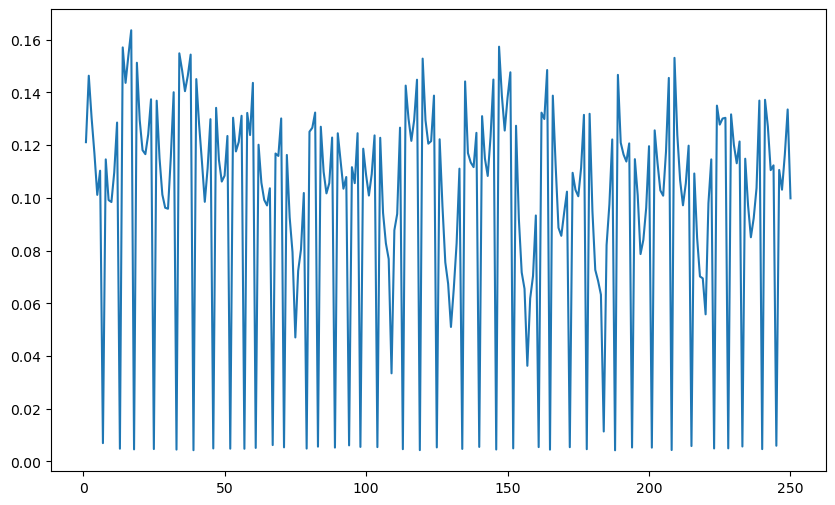

In [65]:
fig, ax = plt.subplots(figsize=(10,6))
xs = np.array(range(250))+1
ax.plot(xs, acc_rate)
plt.show();

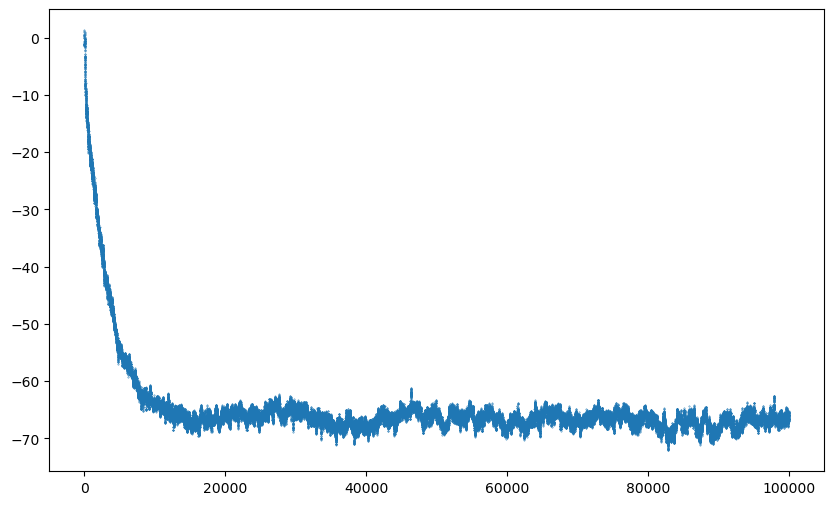

In [76]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
xs = np.array(range(100001))+1
ax.scatter(xs, samples[:,0,5], s=0.1)
plt.show();

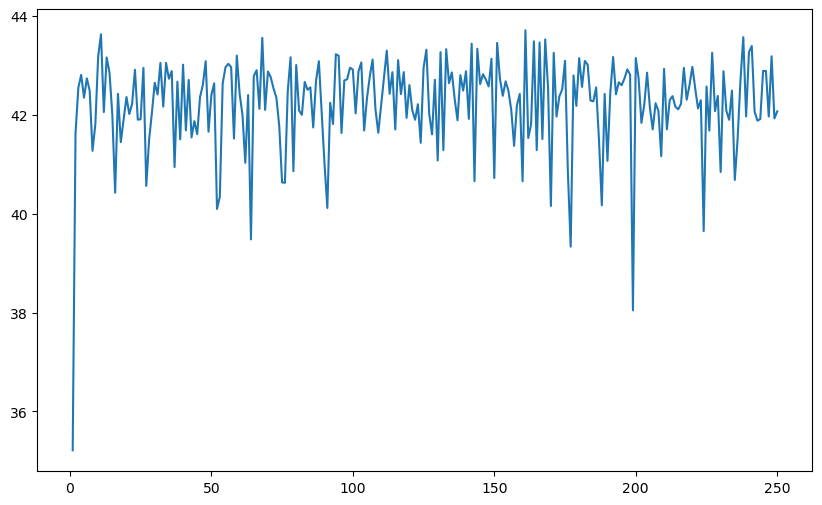

In [72]:
acc_rate = hf["accepts"][:] / 20002
fig, ax = plt.subplots(figsize=(10,6))
xs = np.array(range(250))+1
ax.plot(xs, acc_rate[:250])
plt.show();

In [29]:
# hf['samples'].shape
samples_ehmm = hf["samples"][:].reshape(20002,250,10)

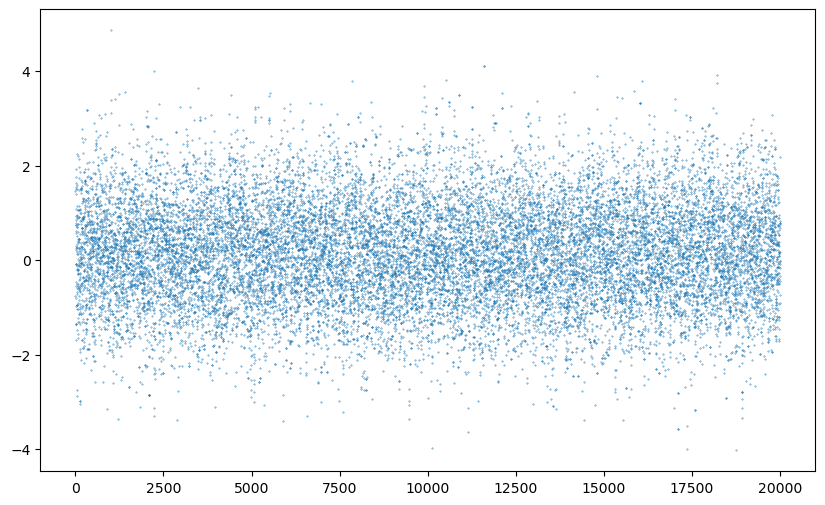

In [73]:
fig, ax = plt.subplots(figsize=(10,6))
xs = np.array(range(20002))+1
ax.scatter(xs, samples_ehmm[:,249,0], s=0.1)
plt.show();

In [74]:
np.mean(samples_ehmm[2000:,249,0])

0.14966536310844425

In [75]:
np.sqrt(np.var(samples_ehmm[2000:,249,0])/(20002-2000))

0.007993274771230019

In [77]:
hf.close()

In [376]:
hf['samples'].shape

(101, 4, 10)

### Samples analysis  

In [123]:
np.mean(hf['samples'][:],0)

array([[ 1.26923453,  0.67128964,  1.27341672, ..., -1.71177241,
        -1.30734357,  0.22029051],
       [-0.26946768,  1.38839734,  1.35613474, ...,  1.82306738,
         1.38157398,  0.1448617 ],
       [-0.16766187,  0.21017736, -1.4933012 , ...,  4.71949672,
         0.70751916,  2.58535694],
       ...,
       [-1.70786738,  2.43569303,  2.85378992, ...,  1.00259316,
         2.31747943,  1.84164097],
       [ 4.18900696,  3.93549244,  4.53473913, ...,  1.65618819,
         1.07947807,  2.52039764],
       [ 1.52886633,  3.08355001,  1.12207898, ...,  2.51767246,
         2.87636094,  3.42093814]])

In [5]:
np.cov((ar[:,-1,:] - meanT).T)

array([[ 0.51353145,  0.10220882,  0.05541566,  0.57510425],
       [ 0.10220882,  1.25339464,  0.61331868,  0.74117343],
       [ 0.05541566,  0.61331868,  3.03568447, -0.04460209],
       [ 0.57510425,  0.74117343, -0.04460209,  5.00363434]])